Class Counts: {'wrinkles': 254, 'dark spots': 272, 'puffy eyes': 247, 'clear skin': 298}


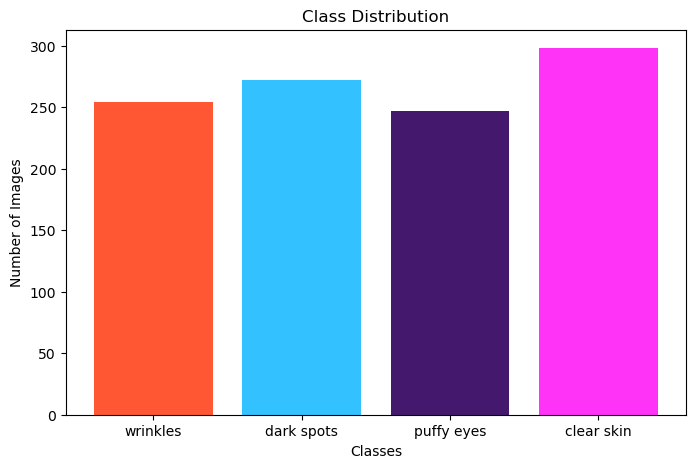

In [7]:
import os
import matplotlib.pyplot as plt

DATASET_DIR = "dataset"

CLASSES = ["wrinkles", "dark spots", "puffy eyes", "clear skin"]

def scan_dataset(dataset_dir=DATASET_DIR):
    class_counts = {}
    
    for cls in CLASSES:
        folder = os.path.join(dataset_dir, cls)
        
        count = len(os.listdir(folder))
        class_counts[cls] = count

    return class_counts

def plot_class_distribution(counts):
    plt.figure(figsize=(8,5))
    colors = ["#FF5733", "#33C1FF", "#44196D", "#FF33F8"]
    plt.bar(counts.keys(), counts.values(),color=colors)
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.show()

if __name__ == "__main__":
    counts = scan_dataset()
    print("Class Counts:", counts)
    plot_class_distribution(counts)


In [11]:
import hashlib
hashes = {}
duplicates = []
import os

DATASET_DIR = "dataset"

for cls in CLASSES:
    folder = os.path.join("dataset", cls)
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        with open(path, 'rb') as f:
            h = hashlib.md5(f.read()).hexdigest()
        if h in hashes:
            duplicates.append((path, hashes[h]))
        else:
            hashes[h] = path
print("duplicates found:", len(duplicates))
for d in duplicates:
    os.remove (d[0])

print("Duplicates Removed.")
counts = scan_dataset()
total_images = sum(counts.values())
print("Total Images after cleanup:", total_images)
print("Updated Class Counts:", counts)


duplicates found: 0
Duplicates Removed.
Total Images after cleanup: 1071
Updated Class Counts: {'wrinkles': 254, 'dark spots': 272, 'puffy eyes': 247, 'clear skin': 298}


In this cell, we apply data augmentation to our training dataset using TensorFlow ImageDataGenerator. Augmentation helps improve model generalization by creating 
multiple transformed versions of the existing images.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)

augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.2
)


train_gen = augmentation.flow_from_directory(
    "dataset",
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_gen = augmentation.flow_from_directory(
    "dataset",
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)
print(train_gen.class_indices)
print(labels[:16])



Found 859 images belonging to 4 classes.
Found 212 images belonging to 4 classes.
{'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


The below Cell contain script to show the augemented Images generated from the training batch. This helps us visually verify that the augmentation is working 
correctly.

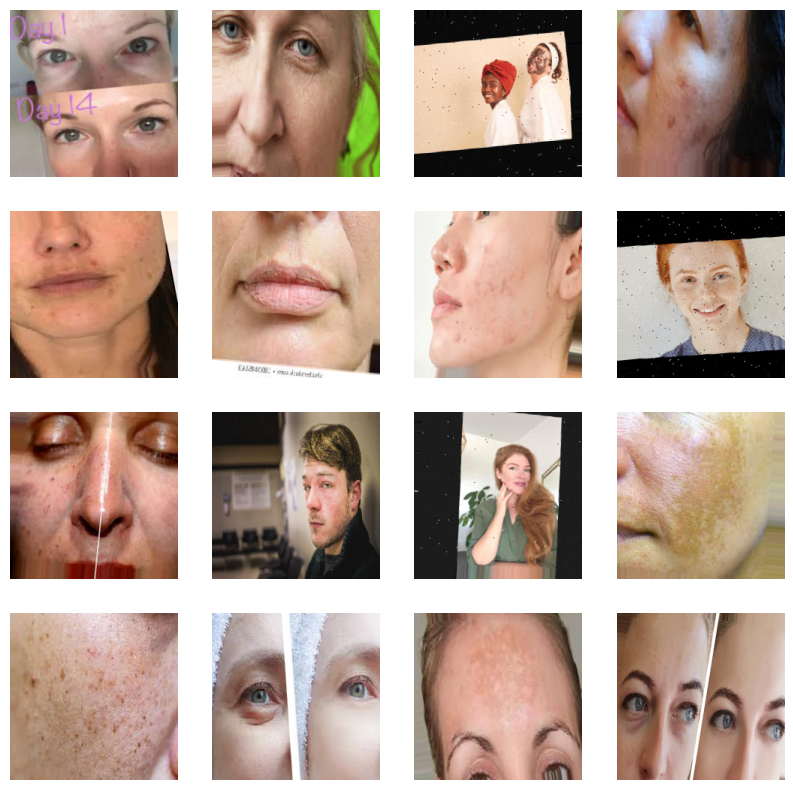

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

images, labels = next(train_gen)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()
